In [2]:
#import the needed librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

In [3]:
#Now let's get and put the data in  pandas dataframe

order_products_train = pd.read_csv('data/order_products.csv.gz')

orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')


In [5]:
grouped = orders.groupby("user_id")["order_id"].aggregate("count").reset_index()
grouped = grouped.head(50)
grouped

,user_id,order_id
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
5,6,4
6,7,21
7,8,4
8,9,4
9,10,6


<AxesSubplot:xlabel='user_id', ylabel='order_id'>

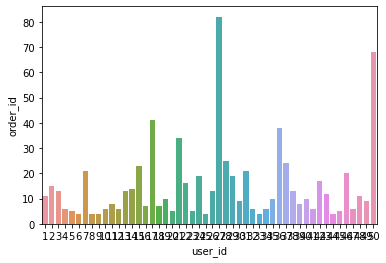

In [6]:
#distribtution number of orders by each customer
sns.barplot(x="user_id", y="order_id",data=grouped)

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Exception: Data must be 1-dimensional

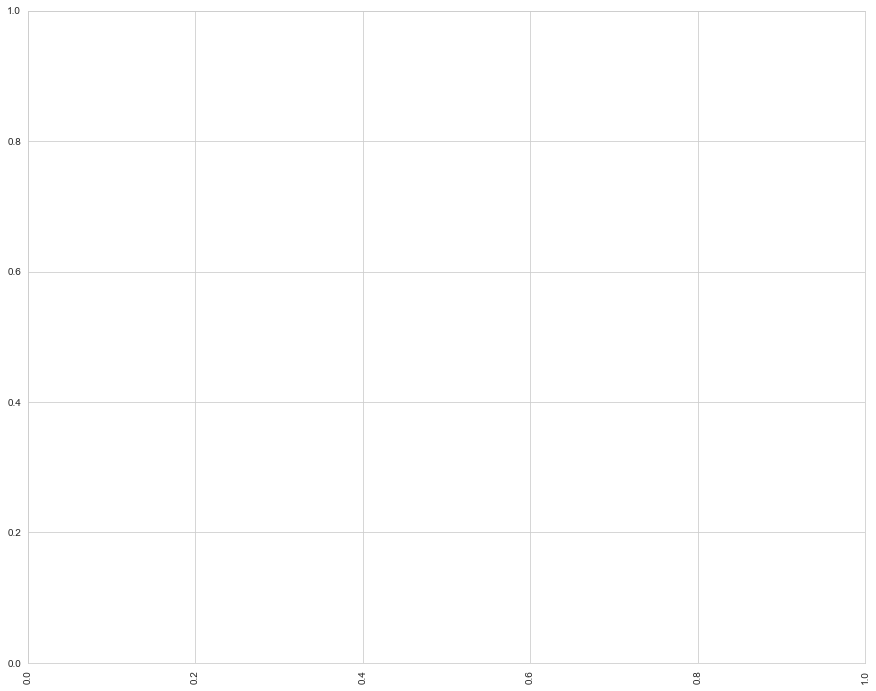

In [4]:
data1 = pd.merge(products, departments, on = "department_id")

In [5]:
data2 = pd.merge(data1, aisles, on = "aisle_id")

In [6]:
data3 = pd.merge(order_products_train, orders, on = "order_id")

In [7]:
data4 = pd.merge(data3, data2, on = "product_id",  how = "left")

In [13]:
data4.head()

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,202279,3,5,9,8.0,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,202279,3,5,9,8.0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,202279,3,5,9,8.0,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,202279,3,5,9,8.0,Natural Sweetener,17,13,pantry,baking ingredients


/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


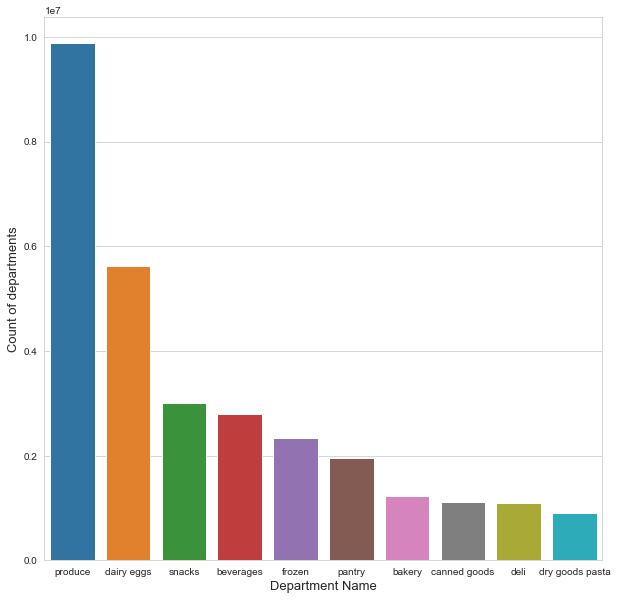

In [20]:
# customer favorite departments and aisles
grouped = data4.department.value_counts().head(10)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Count of departments', fontsize=13)
plt.xlabel('Department Name', fontsize=13)
plt.show()

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


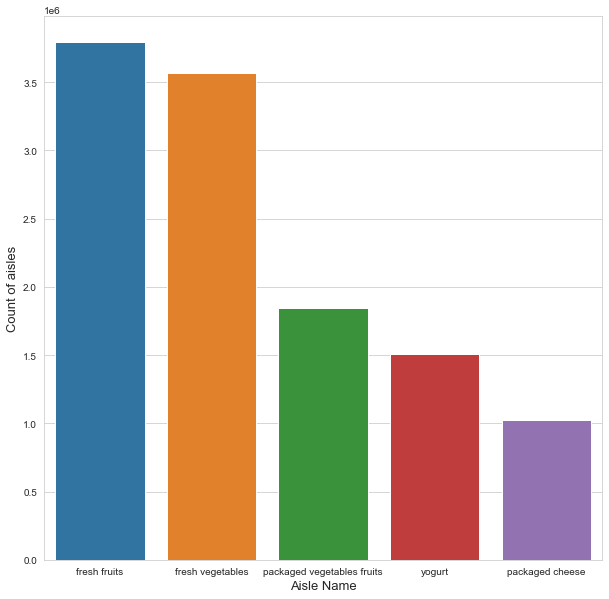

In [19]:
grouped = data4.aisle.value_counts().head(5)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Count of aisles', fontsize=13)
plt.xlabel('Aisle Name', fontsize=13)
plt.show()

 grouped = data4.groupby("department")
 grouped

In [19]:
#best selling Aisles in department based on number of orders
grouped = data4.groupby(['department','aisle']).size()
grouped

department  aisle                     
alcohol     beers coolers                  50496
            red wines                      36424
            specialty wines champagnes     11659
            spirits                        29069
            white wines                    31646
                                           ...  
snacks      ice cream toppings             11706
            mint gum                       23626
            nuts seeds dried fruit        319019
            popcorn jerky                 170441
            trail mix snack mix            37053
Length: 134, dtype: int64

In [32]:
grouped = data4.groupby(['department','aisle'])["order_id"].aggregate("count")
grouped

department  aisle                     
alcohol     beers coolers                 3421040
            red wines                     3420978
            specialty wines champagnes    3420883
            spirits                       3420958
            white wines                   3420825
                                           ...   
snacks      ice cream toppings            3420717
            mint gum                      3420879
            nuts seeds dried fruit        3421083
            popcorn jerky                 3421055
            trail mix snack mix           3420955
Name: order_id, Length: 134, dtype: int64

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
25,4,40285,9,178520,36,1,9,7.0,Traditional Snack Mix,125,19,snacks,trail mix snack mix
107,12,25213,11,152610,22,6,8,10.0,Sweet & Salty Snack Mix,125,19,snacks,trail mix snack mix
108,12,11175,12,152610,22,6,8,10.0,Game Day Barbecue Trail Mix,125,19,snacks,trail mix snack mix
8,2,43668,9,202279,3,5,9,8.0,Classic Blend Cole Slaw,123,4,produce,packaged vegetables fruits
11,3,17704,3,205970,16,5,17,12.0,Lemons,123,4,produce,packaged vegetables fruits
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,644,8465,3,151223,1,5,16,NaN,Free and Clear Baby Wipes,56,18,babies,diapers wipes
7015,728,7749,14,21456,2,1,11,12.0,Bedtime Underwear for Girls Jumbo Pack - Size S,56,18,babies,diapers wipes
6060,630,1160,1,51955,1,0,16,NaN,Pinot Grigio,62,5,alcohol,white wines
7047,729,2120,16,48968,7,1,13,6.0,Sauvignon Blanc,62,5,alcohol,white wines


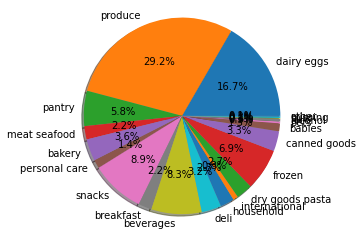

<Figure size 576x432 with 0 Axes>

In [36]:
# Draw pie chart 
labels = data4['department'].unique().tolist()
counts = data4['department'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()